# Inspect processed data from Ashley 21 Mar 2018

**Objectives:**
* make some swarmplots of the logcpm processed data from Ashley

**AshleyLu**: Those are the two tables we currently use
```
/ddn1/vol1/staging/leuven/stg_00002/cbd/projects/BDS_SpatialTranscriptomics/001.merged/counts/raw_filtered.pickle
/ddn1/vol1/staging/leuven/stg_00002/cbd/projects/BDS_SpatialTranscriptomics/001.merged/counts/logcpm_merge_20180212.pickle
```

Downloaded to: 
```
/media/tmo/data/work/datasets/02_ST/ashley_21.03.2018/
```

In [1]:
import pandas as pd
import numpy as np
import os
import pickle

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

sns.set(style="whitegrid")

---

### **Read the DataFrames**

In [2]:
wd = '/media/tmo/data/work/datasets/02_ST/ashley_21.03.2018/'

raw_filtered_path = wd + 'raw_filtered.pickle'
logcpm_merge_path = wd + 'logcpm_merge_20180212.pickle'

In [3]:
raw_filtered_df = pickle.load(open(raw_filtered_path, "rb"))

In [4]:
raw_filtered_df.head()

,-343C11.2,00R_AC107638.2,0610005C13Rik,0610006L08Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,...,n-R5s90,n-R5s92,n-R5s93,n-R5s94,n-R5s95,n-R5s96,n-R5s97,n-R5s98,n-TSaga9,n-TStga1
N05_C2__20_6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
N05_C2__17_6,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
N05_C2__16_6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
N05_C2__19_6,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
N05_C2__18_6,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
logcpm_merge_df = pickle.load(open(logcpm_merge_path, "rb"))

In [6]:
logcpm_merge_df.index.name = 'spot_UID'

In [8]:
logcpm_merge_df.reset_index(inplace=True)

In [9]:
def add_slide_ID(df):
    df['slide_ID'] = df['spot_UID'].apply(lambda x: str(x).split('__')[0])
    
    return df

In [10]:
logcpm_merge_df = add_slide_ID(logcpm_merge_df)

In [11]:
logcpm_merge_df.head()

,spot_UID,-343C11.2,00R_AC107638.2,0610005C13Rik,0610006L08Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,...,n-R5s93,n-R5s94,n-R5s95,n-R5s96,n-R5s97,n-R5s98,n-TSaga9,n-TStga1,sampleID,slide_ID
0,N05_C2__20_6,2.982974,2.982974,2.982974,2.982974,2.982974,2.982974,4.984943,2.982974,2.982974,...,2.982974,2.982974,2.982974,2.982974,2.982974,2.982974,2.982974,2.982974,N05_C2,N05_C2
1,N05_C2__17_6,2.982974,2.982974,2.982974,2.982974,6.827059,5.924174,2.982974,2.982974,2.982974,...,2.982974,2.982974,2.982974,2.982974,2.982974,2.982974,2.982974,2.982974,N05_C2,N05_C2
2,N05_C2__16_6,2.982974,2.982974,2.982974,2.982974,2.982974,5.609164,2.982974,2.982974,5.609164,...,2.982974,2.982974,2.982974,2.982974,2.982974,2.982974,2.982974,2.982974,N05_C2,N05_C2
3,N05_C2__19_6,2.982974,2.982974,2.982974,2.982974,7.661385,2.982974,2.982974,2.982974,5.157746,...,2.982974,2.982974,2.982974,2.982974,2.982974,2.982974,2.982974,2.982974,N05_C2,N05_C2
4,N05_C2__18_6,2.982974,2.982974,2.982974,2.982974,6.738947,6.738947,2.982974,2.982974,2.982974,...,2.982974,2.982974,2.982974,2.982974,2.982974,2.982974,2.982974,2.982974,N05_C2,N05_C2


In [17]:
gene_columns = logcpm_merge_df.columns[1:46454+1]

In [24]:
gene_columns

Index(['-343C11.2', '00R_AC107638.2', '0610005C13Rik', '0610006L08Rik',
       '0610007P14Rik', '0610009B22Rik', '0610009E02Rik', '0610009L18Rik',
       '0610009O20Rik', '0610010F05Rik',
       ...
       'n-R5s90', 'n-R5s92', 'n-R5s93', 'n-R5s94', 'n-R5s95', 'n-R5s96',
       'n-R5s97', 'n-R5s98', 'n-TSaga9', 'n-TStga1'],
      dtype='object', length=46454)

In [34]:
gene_columns[minima > 3]

Index(['Cst3', 'Fth1', 'Gm10925', 'Gm13339', 'Gm13340', 'Gm13341', 'Gm28437',
       'Gm28438', 'Gm28661', 'Gm29216', 'Gm42418', 'Gnas', 'Ppp3ca', 'Sparcl1',
       'Supt7l', 'mt-Atp6', 'mt-Co1', 'mt-Co2', 'mt-Co3', 'mt-Cytb', 'mt-Nd1',
       'mt-Nd2', 'mt-Nd3', 'mt-Nd4', 'mt-Nd5', 'mt-Rnr1', 'mt-Rnr2'],
      dtype='object')

In [32]:
%%time
minima = logcpm_merge_df[gene_columns].min()

CPU times: user 5.27 s, sys: 3.94 s, total: 9.22 s
Wall time: 9.21 s


In [33]:
minima.value_counts()

2.982974     46357
2.982974        70
10.382651        1
9.556767         1
7.783619         1
12.164486        1
11.365652        1
10.513312        1
11.658587        1
11.980309        1
8.371350         1
7.923518         1
7.531659         1
11.044458        1
8.682580         1
11.994886        1
7.318592         1
9.693982         1
10.872654        1
6.357570         1
7.686509         1
6.329034         1
7.032615         1
10.816603        1
12.882449        1
10.445079        1
11.695971        1
9.538029         1
7.890007         1
dtype: int64

---

### **Plot gene expression swarmplots**

In [36]:
def plot_gene_swarm_by_slide(df, gene):
    fig, ax = plt.subplots(figsize=(50, 12))
    
    data = df[['slide_ID', gene]]
    
    slides = df['slide_ID'].unique()
    slides.sort()
    
    g = sns.swarmplot(data=data, x='slide_ID', y=gene, palette="tab20", order=slides)
    g.set_xticklabels(rotation=90, labels=slides)

    plt.show()

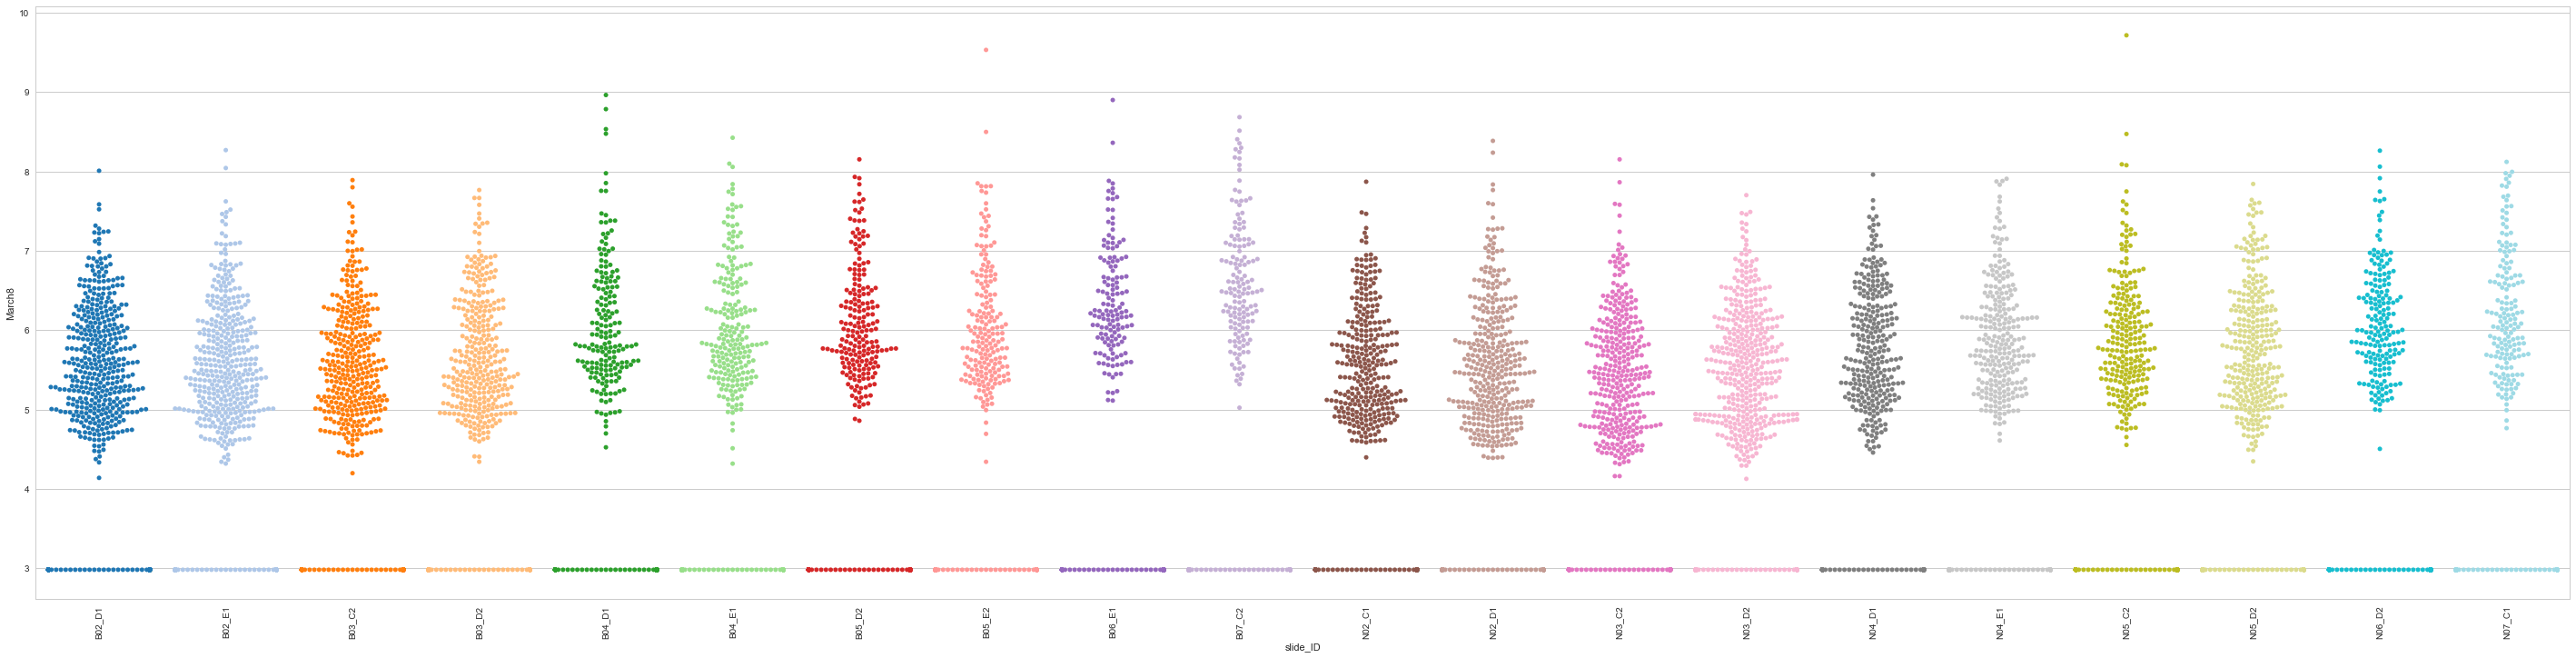

In [27]:
plot_gene_swarm_by_slide(logcpm_merge_df, 'March8')

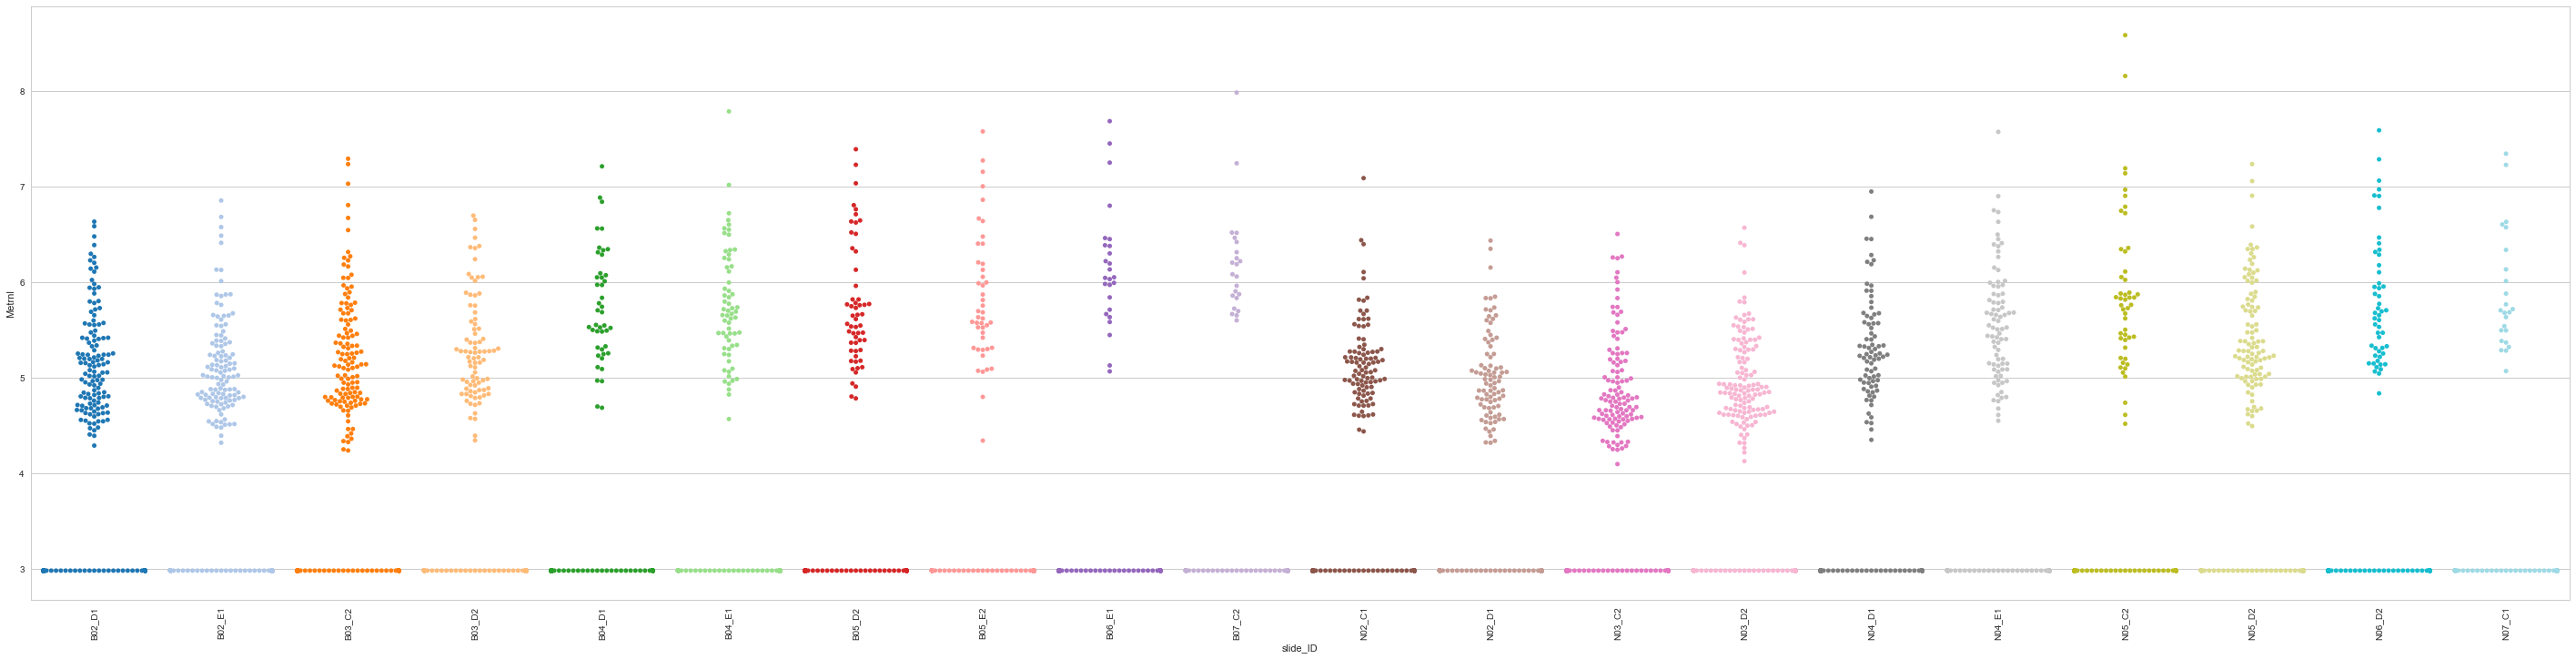

In [28]:
plot_gene_swarm_by_slide(logcpm_merge_df, 'Metrnl')

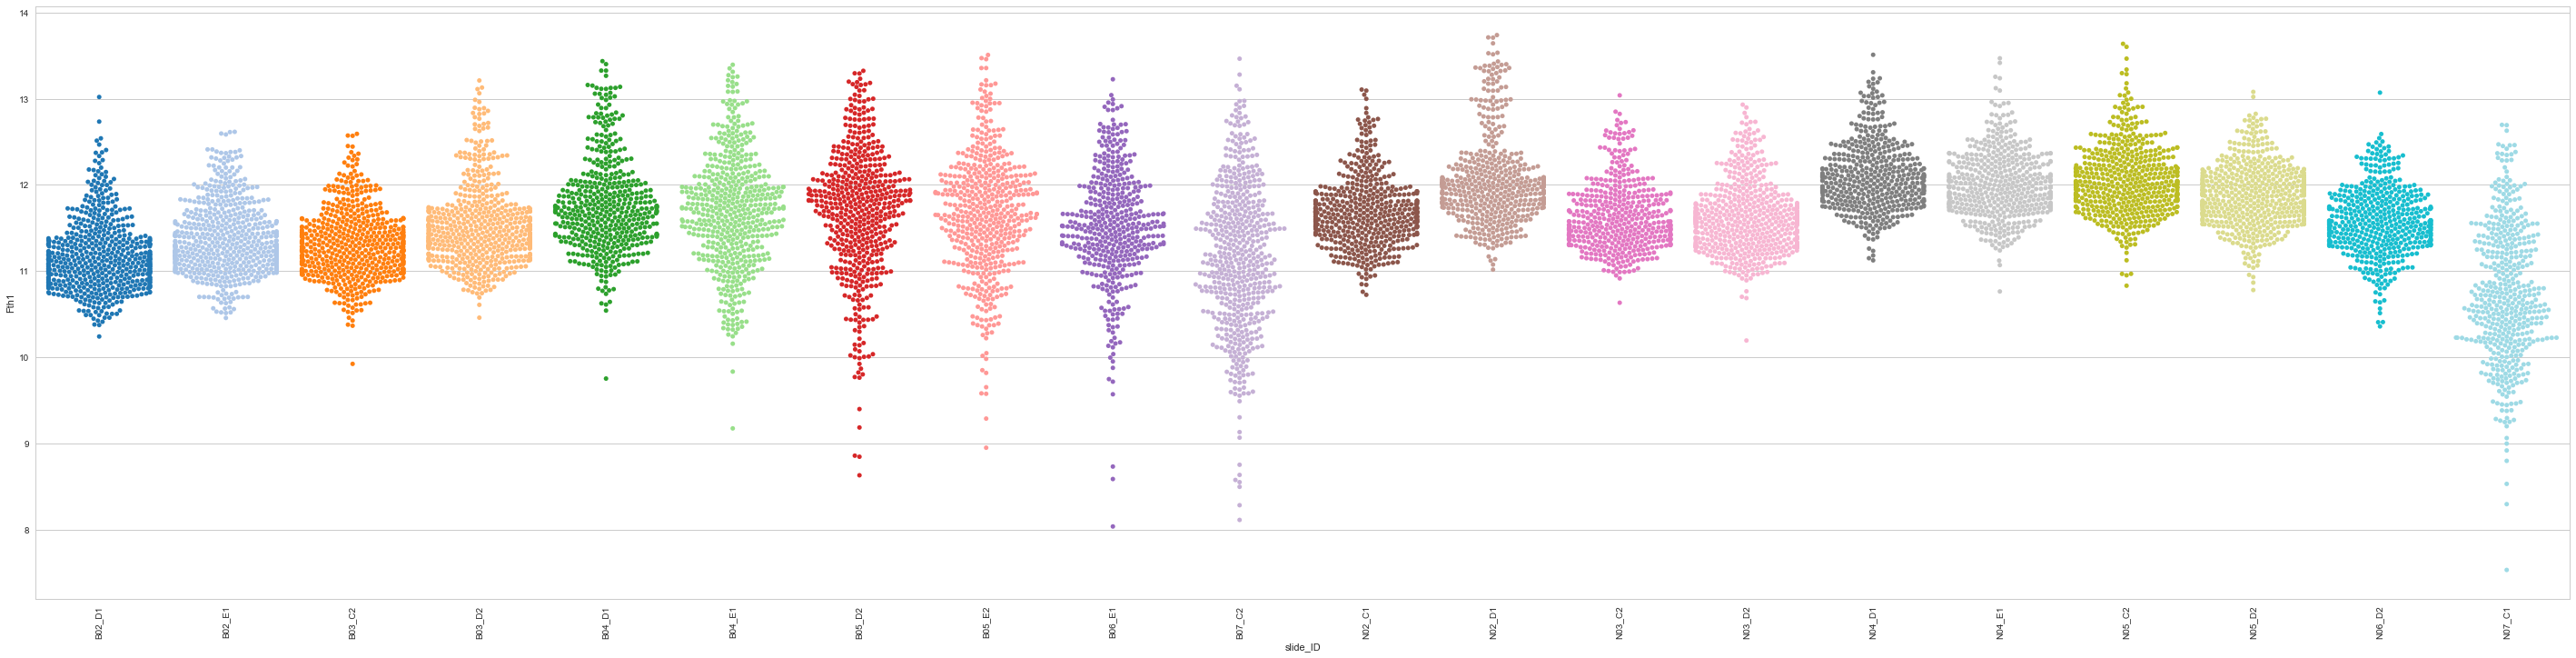

In [37]:
plot_gene_swarm_by_slide(logcpm_merge_df, 'Fth1')